In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

import sys
import os

dir_current = globals()['_dh'][0]
dir_TNGcube = dir_current+'/../'

sys.path.append(dir_TNGcube)

from queryTNG import *

Populating the interactive namespace from numpy and matplotlib


## Isolate redshift (snapNum)

In [2]:
snapNum = get_snapNum(redshift=0.3, simName='TNG50-1', baseURL=baseURL)
#snapNum

In [3]:
QTNG = QueryTNG(simName='TNG50-1', snapNum=snapNum)

## Find subhalo candidates

In [4]:
subhaloIDs = QTNG.query_subhaloCat(mass_range=[1e10, 1e15], vmax_range=[50., 1050.], limit=50, pageID=1)
#subhaloIDs

search url: http://www.tng-project.org/api/TNG50-1/snapshots/78/subhalos/?limit=50&offset=50&mass__gt=0.6774&mass__lt=67740.0&vmax__gt=50.0&vmax__lt=1050.0


## Test candidates

In [5]:
catalog = ['placeholder']*len(subhaloIDs)

for i in range(len(subhaloIDs)):
    try: catalog[i] = QTNG.download_subhalos(subhaloIDs=[subhaloIDs[i]])
    except KeyError: print(f'{subhaloIDs[i]} has no gas particles.')

http://www.tng-project.org/api/TNG50-1/snapshots/78/subhalos/51/cutout.hdf5
http://www.tng-project.org/api/TNG50-1/snapshots/78/subhalos/52/cutout.hdf5
http://www.tng-project.org/api/TNG50-1/snapshots/78/subhalos/53/cutout.hdf5
53 has no gas particles.
http://www.tng-project.org/api/TNG50-1/snapshots/78/subhalos/54/cutout.hdf5
http://www.tng-project.org/api/TNG50-1/snapshots/78/subhalos/55/cutout.hdf5
55 has no gas particles.
http://www.tng-project.org/api/TNG50-1/snapshots/78/subhalos/56/cutout.hdf5
http://www.tng-project.org/api/TNG50-1/snapshots/78/subhalos/57/cutout.hdf5
57 has no gas particles.
http://www.tng-project.org/api/TNG50-1/snapshots/78/subhalos/58/cutout.hdf5
58 has no gas particles.
http://www.tng-project.org/api/TNG50-1/snapshots/78/subhalos/59/cutout.hdf5
59 has no gas particles.
http://www.tng-project.org/api/TNG50-1/snapshots/78/subhalos/60/cutout.hdf5
60 has no gas particles.
http://www.tng-project.org/api/TNG50-1/snapshots/78/subhalos/61/cutout.hdf5
61 has no gas 

In [6]:
filename_pkl = ['placeholder']*len(subhaloIDs)
for i in range(len(subhaloIDs)): filename_pkl[i] = f'subhalo_{subhaloIDs[i]}.pkl'

subhalo = ['placeholder']*len(subhaloIDs)
for i in range(len(subhaloIDs)): 
    try: subhalo[i] = pickle.load(open(filename_pkl[i], 'rb'))
    except FileNotFoundError: continue

In [7]:
from utils import *

for i in range(len(subhaloIDs)):
    try:
        R_spin = spin_rotation(spin0=subhalo[i].info['spin'], spinR=[0, 0, -1])
        R_sini = sini_rotation(sini=1.0) # edge on on x-y plane
        R_pa = PA_rotation(theta=0.)
        Rtot = R_pa@R_sini@R_spin
    
        #theta = 9. *np.pi/180.
        #dx = [0.9,1.3,0]
        #dv = [0.,0.,4.5]
    
        dv = [0.,0.,0.]
        theta = 0. *np.pi/180.
        dx = [0.,0.,0]
    
        subhalo[i].rotation(Rtot)
        Rth = PA_rotation(theta=theta)
        subhalo[i].rotation(Rth)
        subhalo[i].recenter_pos(dx=dx)
        subhalo[i].recenter_vel(dv=dv)
    except AttributeError: continue

In [8]:
def plotImg_subhalo(subhalo, idx=0, idy=1, ptlType='gas', D_x=15):
    image_npix = 91
    
    bins_pos = np.linspace(-D_x, D_x, image_npix)
    
    pos = subhalo.snap[ptlType]['pos']
    mass = subhalo.snap[ptlType]['mass']

    pos_label = {0:'$\Delta x$ [ckpc/h]', 1: '$\Delta y$ [ckpc/h]', 2:'$\Delta z$ [ckpc/h]'}
    
    fig, ax = plt.subplots(1, 1, figsize=(4.3, 4))
    plt.rc('font', size=14)
    
    ax.hist2d(pos[:,idx], pos[:,idy], weights=mass, bins=bins_pos)
    
    ax.set_xlabel(pos_label[idx])
    ax.set_ylabel(pos_label[idy])
    
    ax.set_aspect('equal')
    
    ax.axhline(y=0, color='lightgray', ls=':')
    ax.axvline(x=0, color='lightgray', ls=':')
    
    return ax

def plotXV_subhalo(subhalo, id_pos = 1, id_vel = 0, ptlType='stars'):
    D_x = 15.
    D_v = 250.
    bins_pos = np.linspace(-D_x, D_x, 41)
    bins_vel = np.linspace(-D_v, D_v, 41)
    
    vel_label = {0:'$v_x$ [km/s]', 1: '$v_y$ [km/s]', 2:'$v_z$ [km/s]'}
    pos_label = {0:'$\Delta x$ [ckpc/h]', 1: '$\Delta y$ [ckpc/h]', 2:'$\Delta z$ [ckpc/h]'}
    
    pos = subhalo.snap[ptlType]['pos']
    mass = subhalo.snap[ptlType]['mass']
    vel = subhalo.snap[ptlType]['vel']

    fig, ax = plt.subplots(1, 1, figsize=(6., 4))
    plt.rc('font', size=14)
    
    ax.hist2d(pos[:,id_pos], vel[:,id_vel], weights=mass, bins=(bins_pos, bins_vel))
    
    ax.set_xlabel(pos_label[id_pos])
    ax.set_ylabel(vel_label[id_vel])
    
    ax.axhline(y=0, color='lightgray', ls=':')
    ax.axvline(x=0, color='lightgray', ls=':')
    
    #plt.title(ptlType)
    #plt.savefig('spec.pdf',bbox_inches='tight')
    
    return ax

53 does not exist.
55 does not exist.
57 does not exist.
58 does not exist.
59 does not exist.
60 does not exist.
61 does not exist.
64 does not exist.
65 does not exist.
69 does not exist.
70 does not exist.
71 does not exist.
74 does not exist.
75 does not exist.
76 does not exist.
80 does not exist.
81 does not exist.
82 does not exist.
83 does not exist.
84 does not exist.
87 does not exist.
90 does not exist.
91 does not exist.
92 does not exist.
95 does not exist.
99 does not exist.
100 does not exist.
102 does not exist.
104 does not exist.
107 does not exist.
108 does not exist.


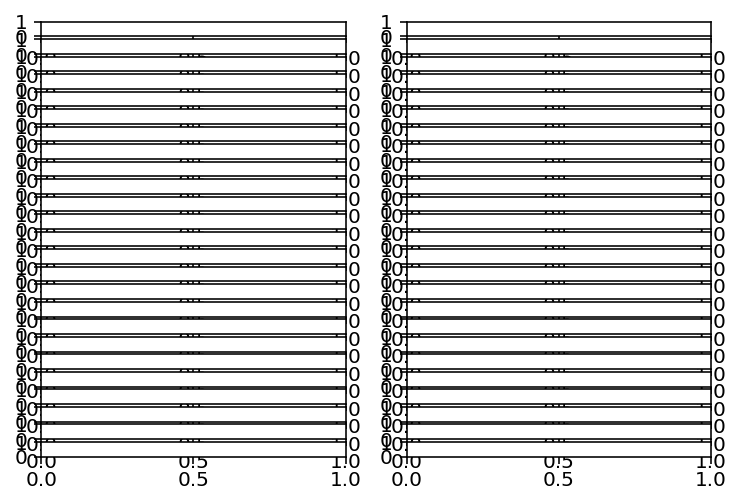

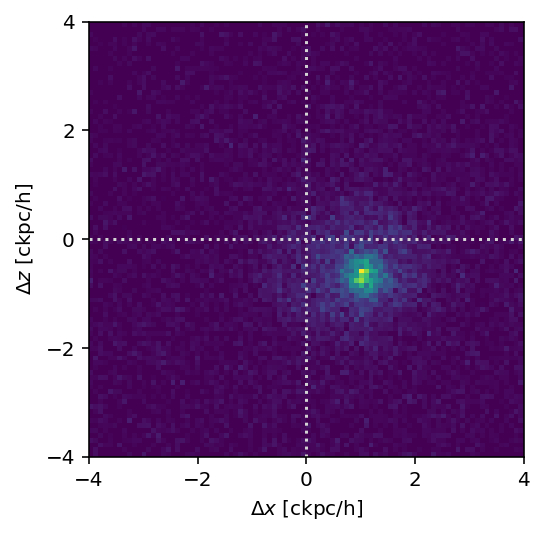

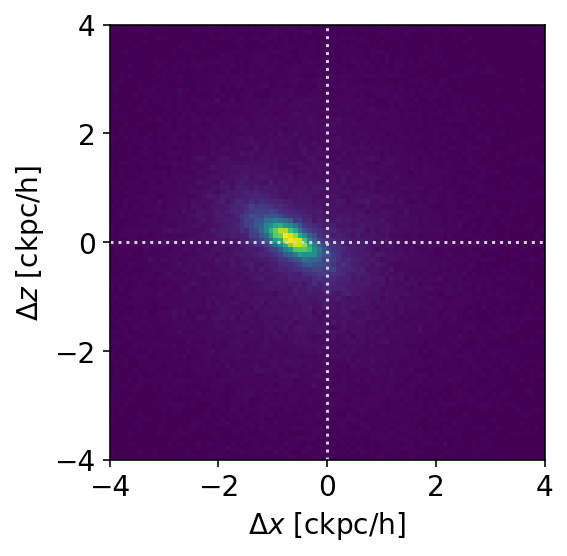

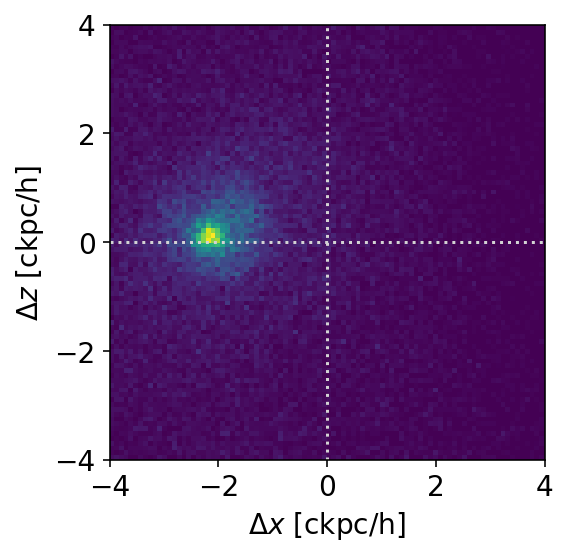

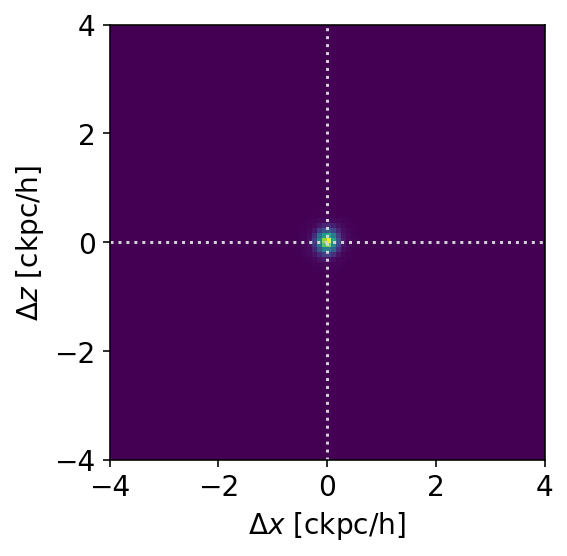

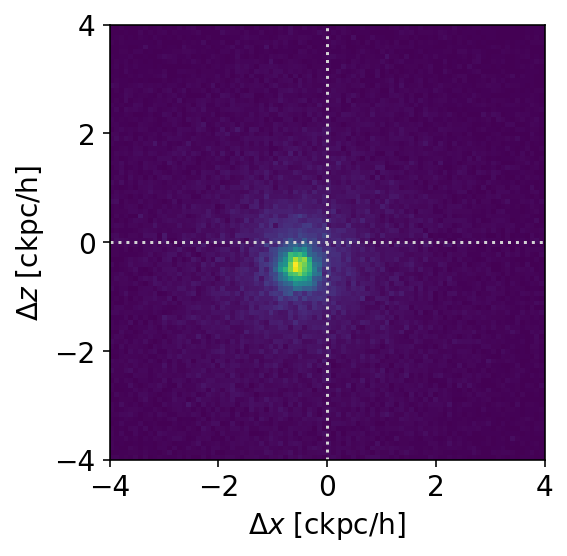

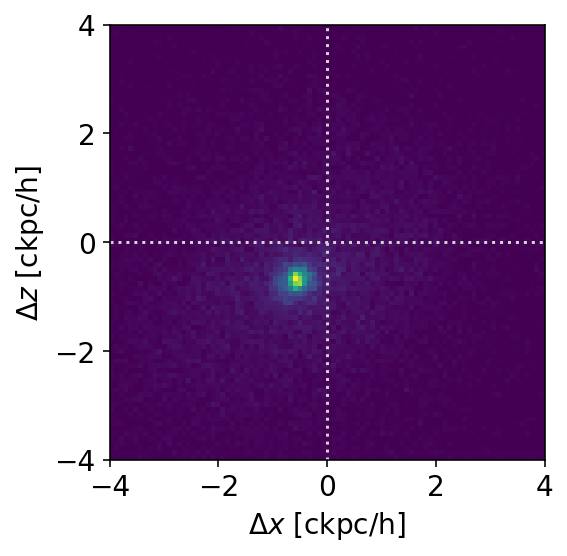

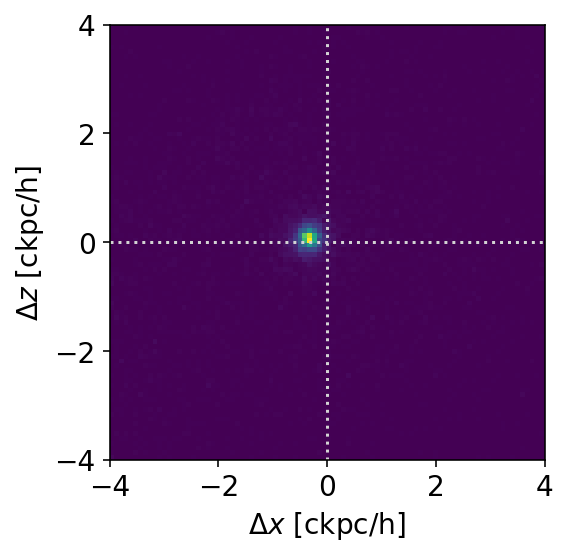

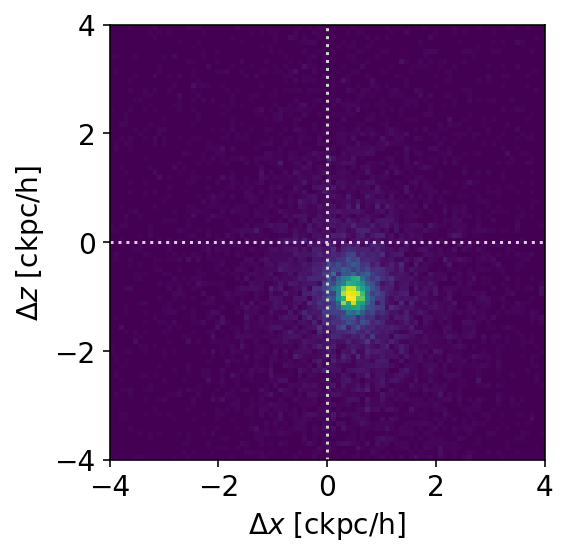

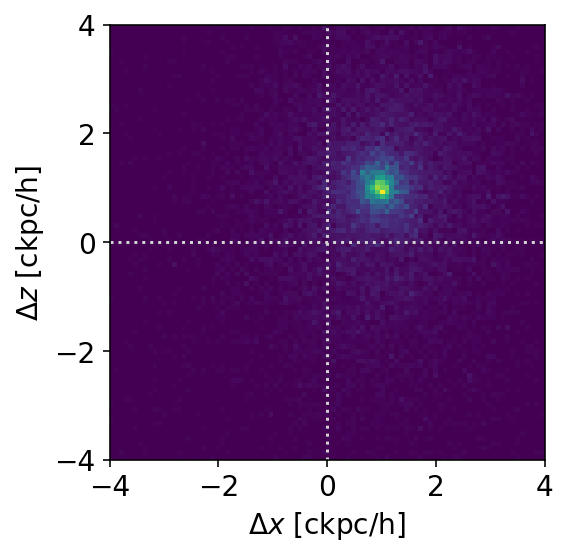

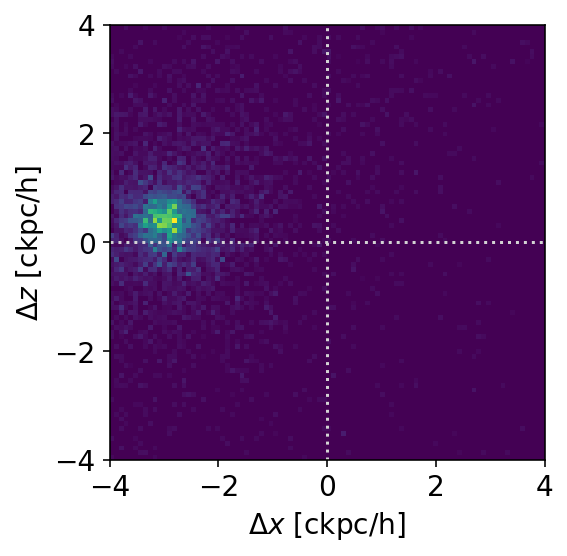

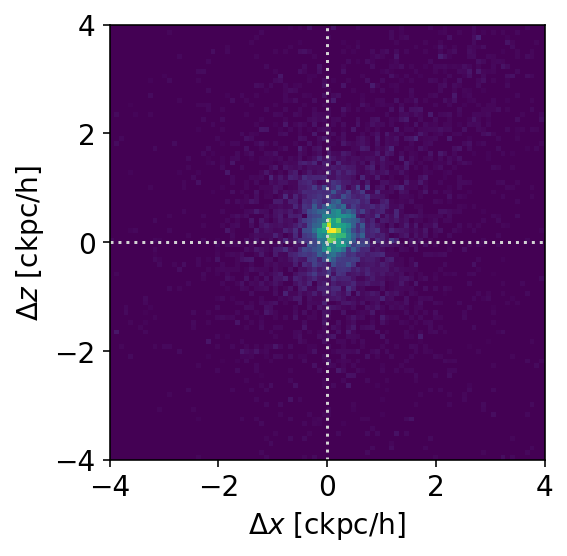

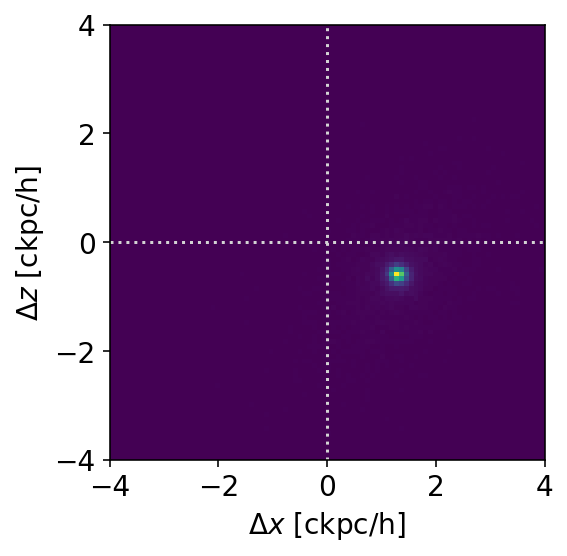

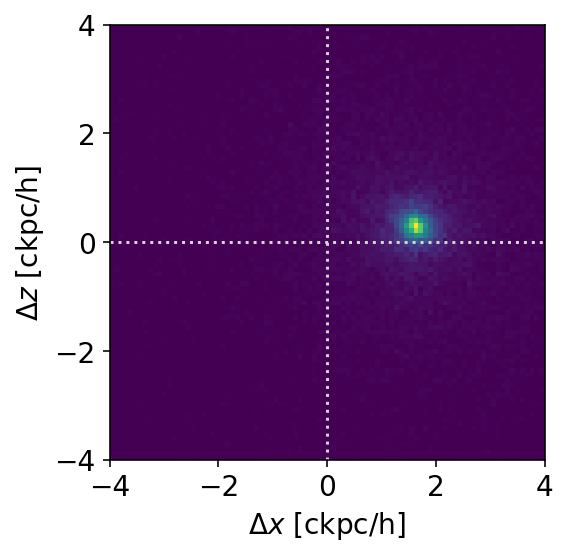

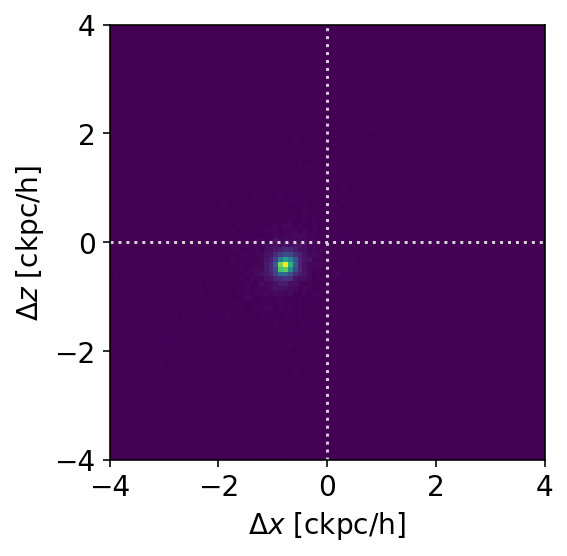

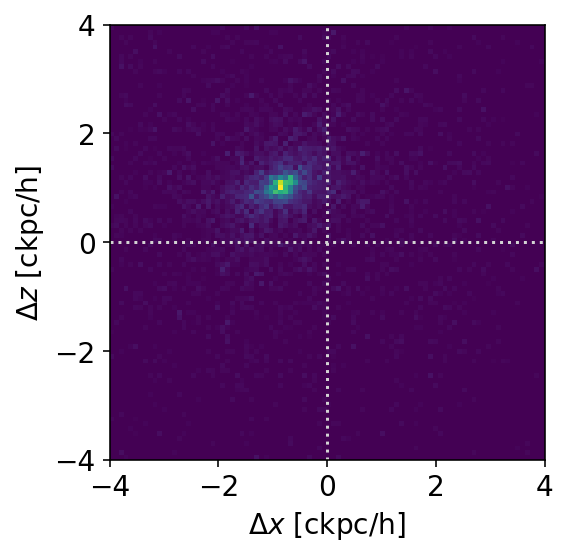

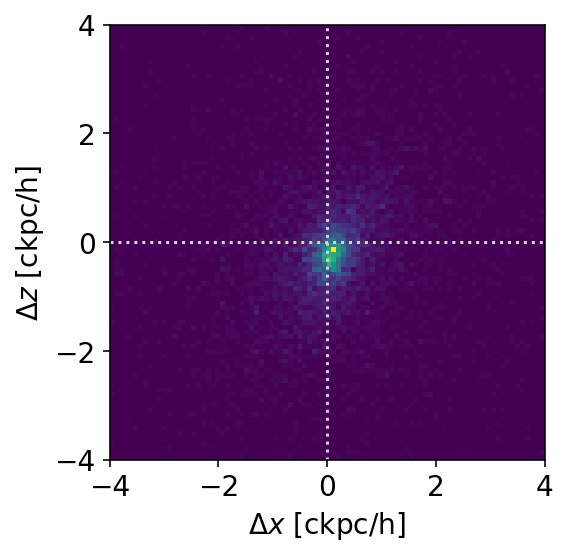

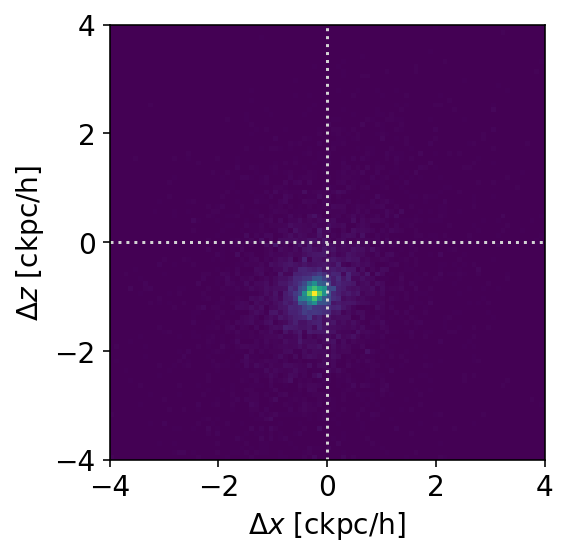

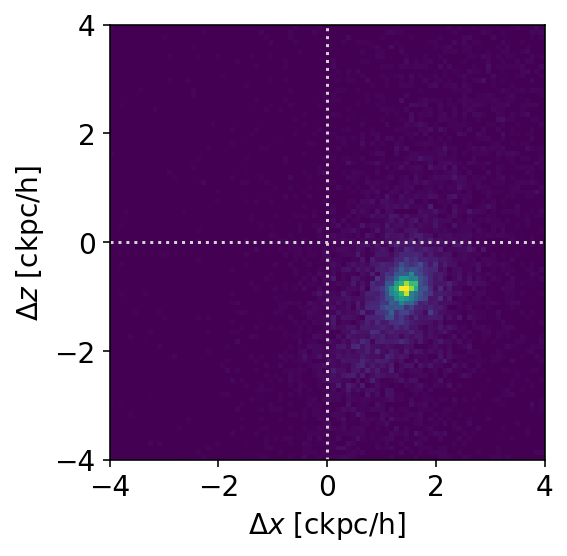

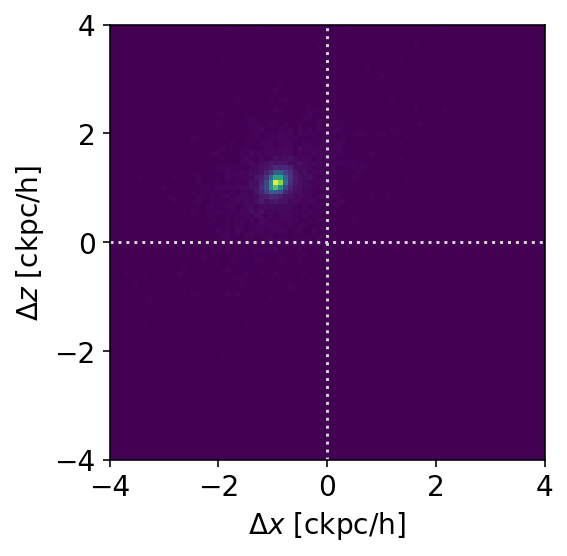

In [9]:
fig, axs = plt.subplots(int(len(subhaloIDs)/2),2,sharey=False) #figsize=[10,16],
axs=axs.flatten()

for i in range(len(subhaloIDs)):
    try:
        axs[i] = plotImg_subhalo(subhalo[i], idx=0, idy=2, ptlType='stars', D_x=4)
    except AttributeError: print(f'{subhaloIDs[i]} does not exist.')

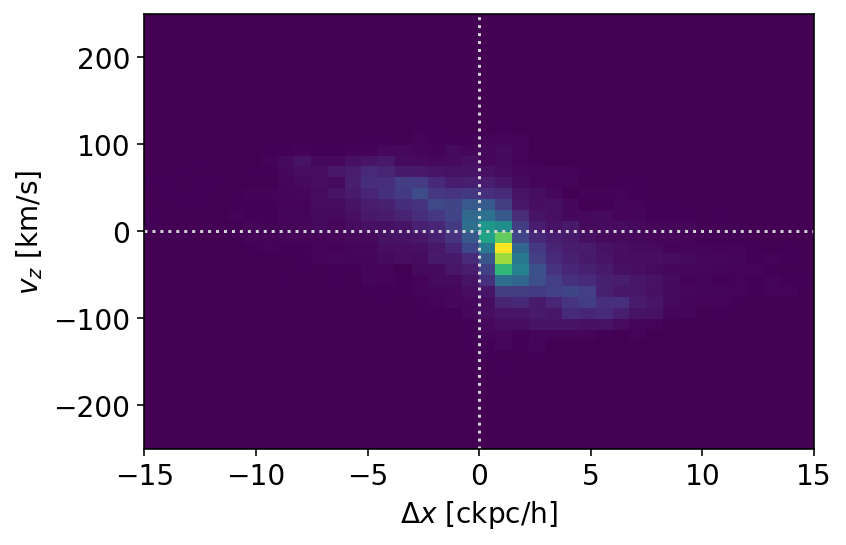

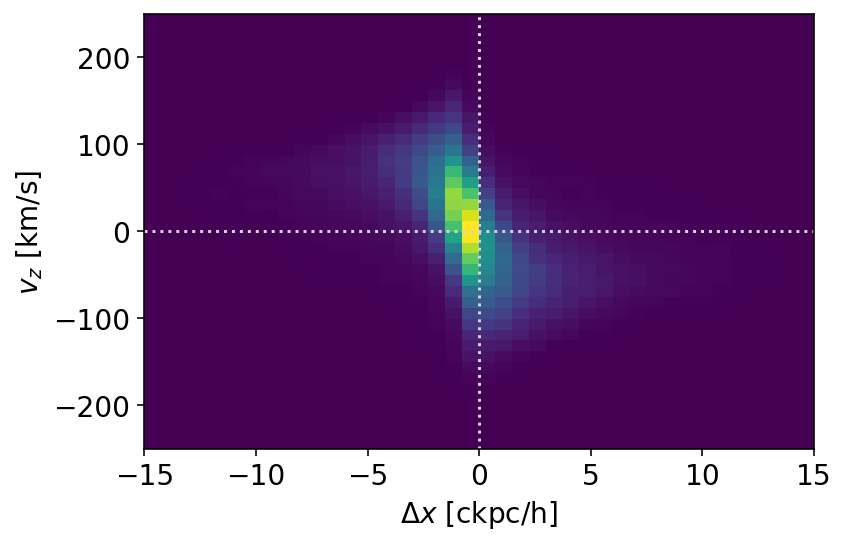

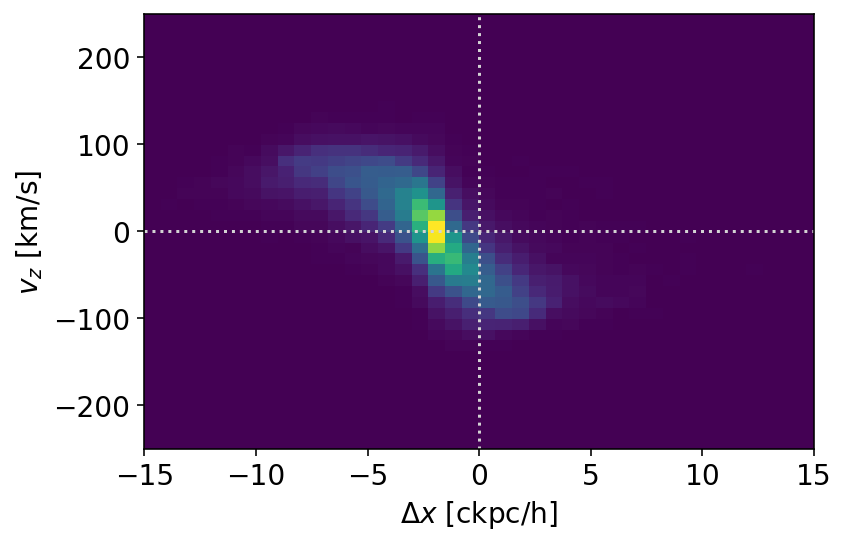

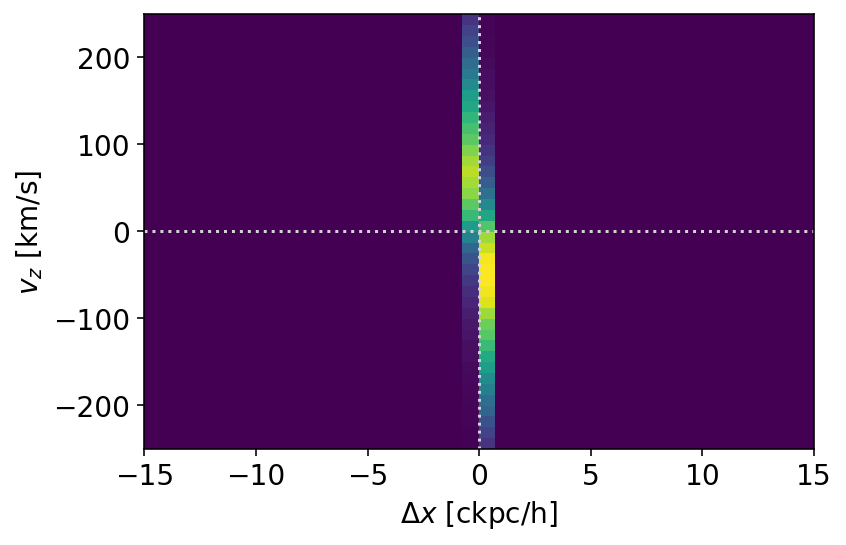

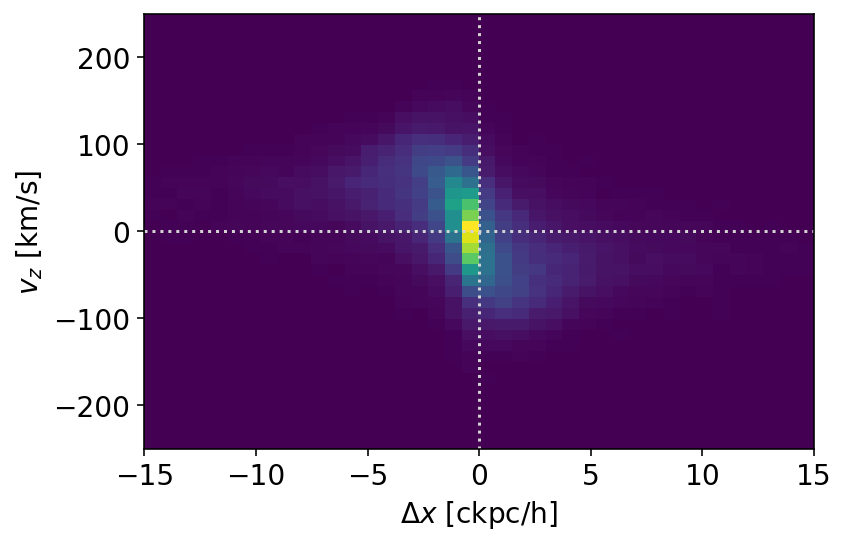

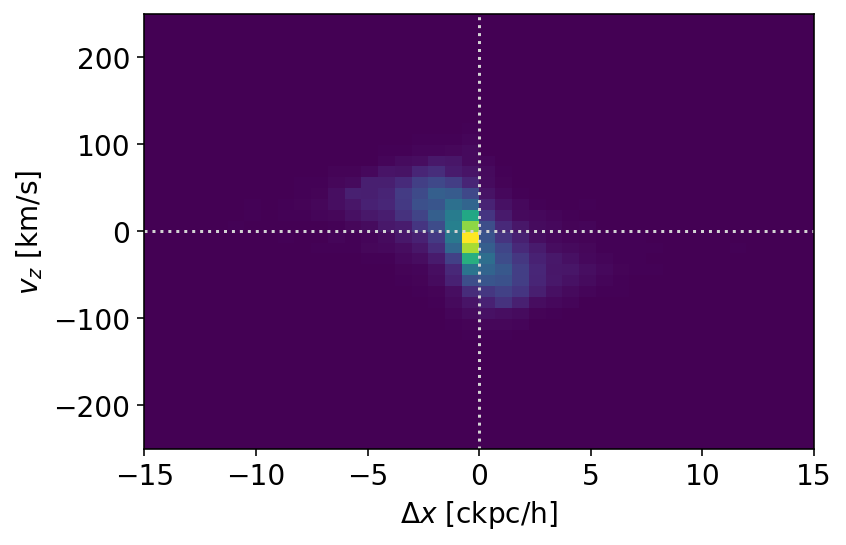

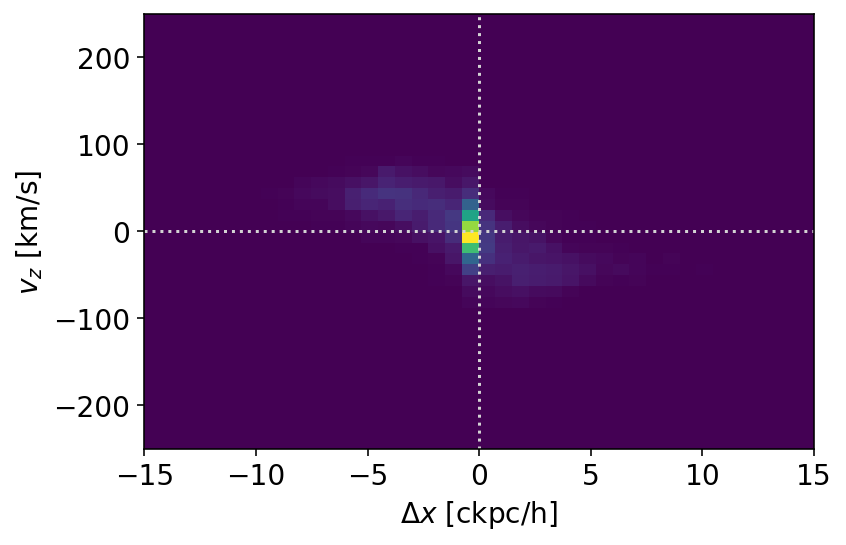

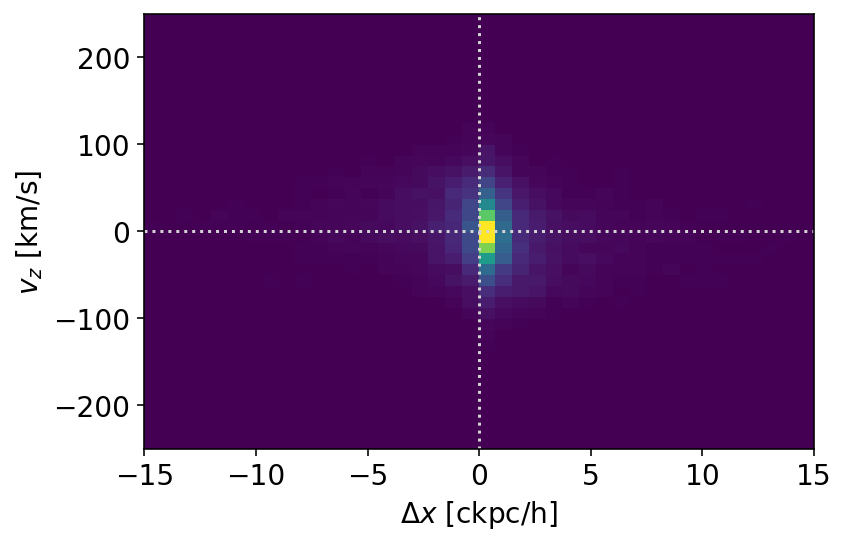

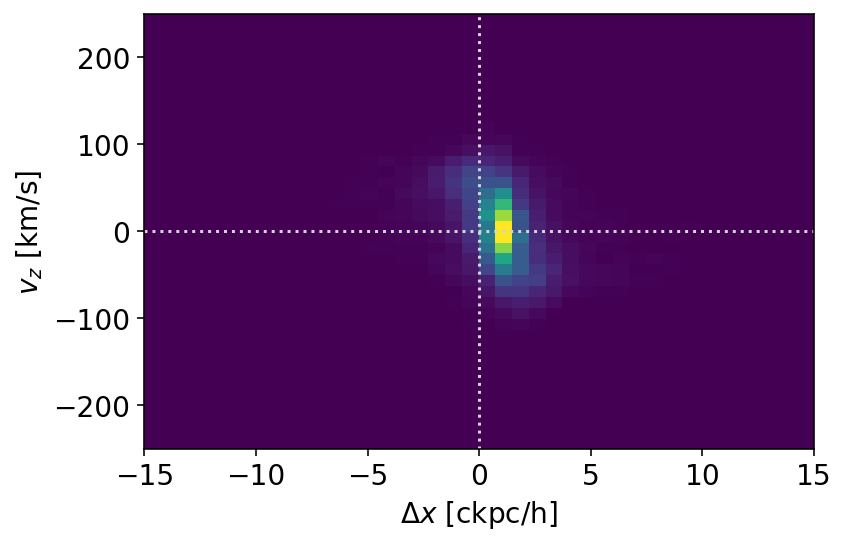

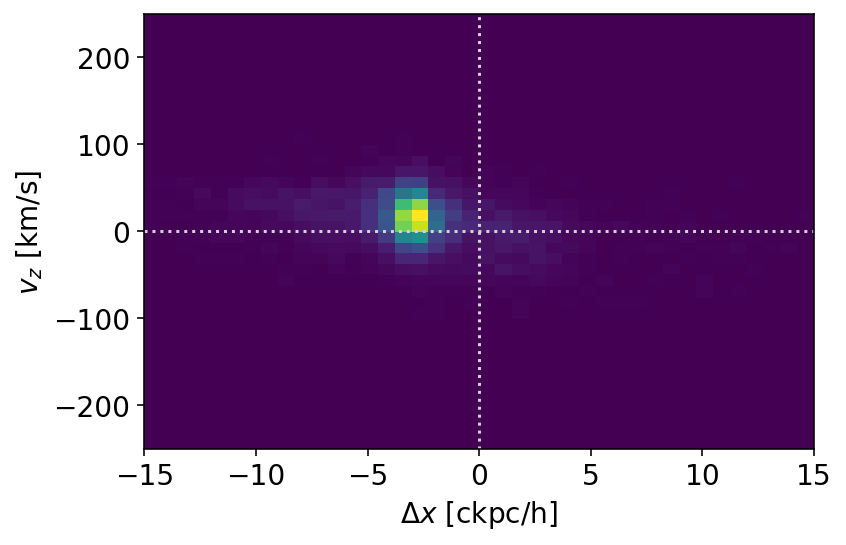

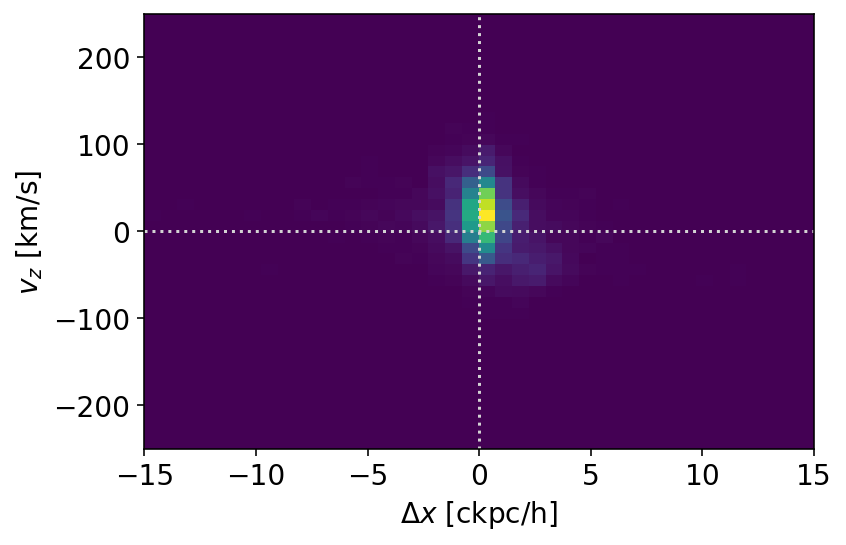

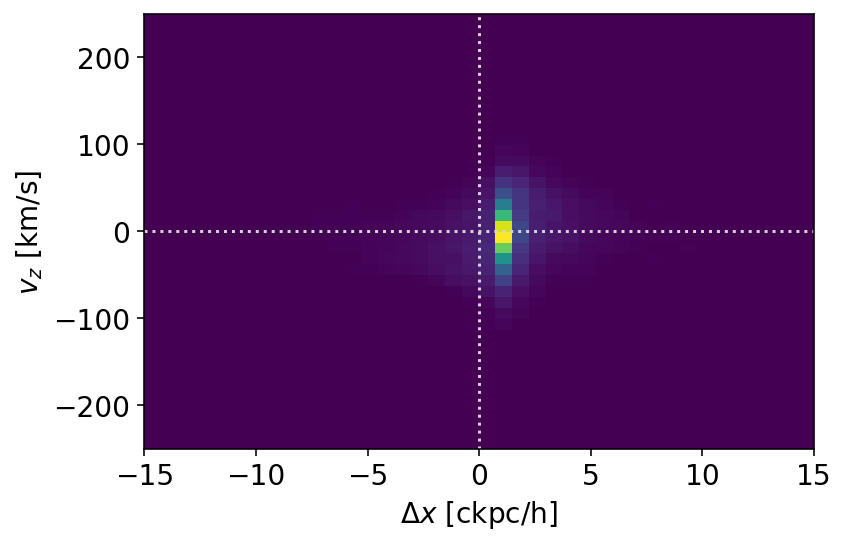

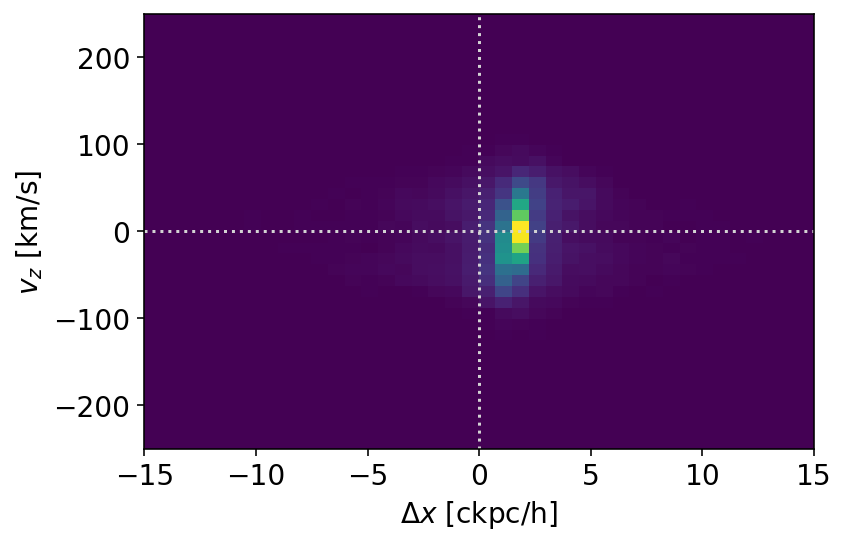

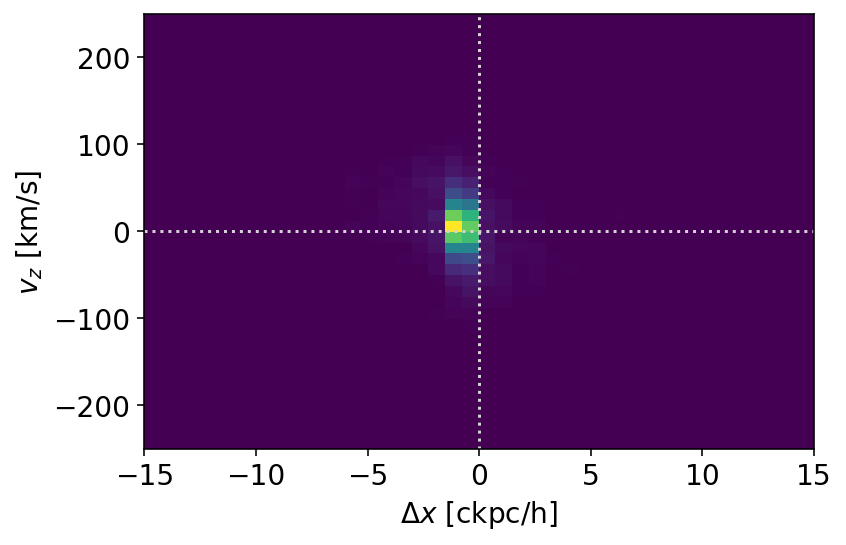

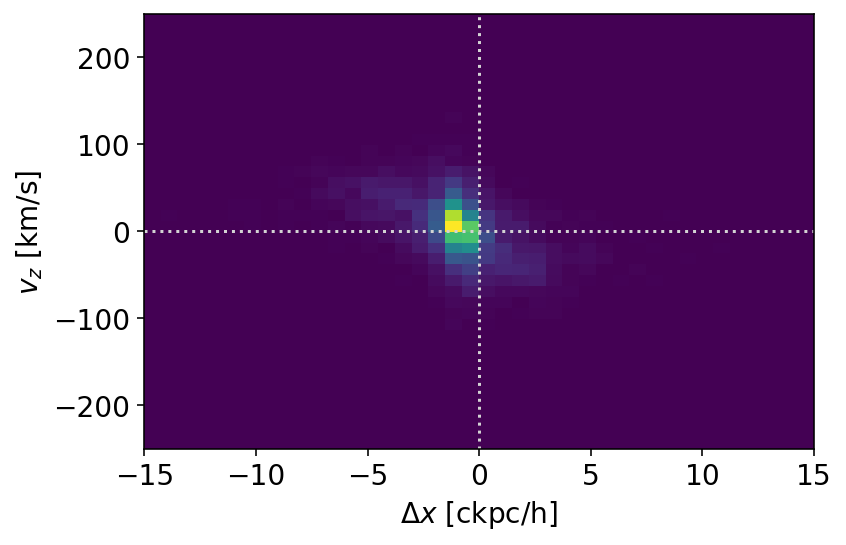

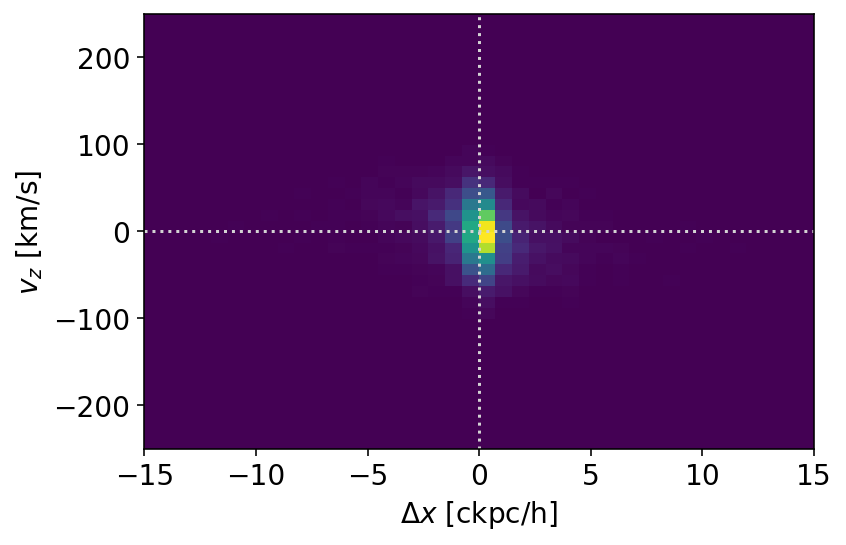

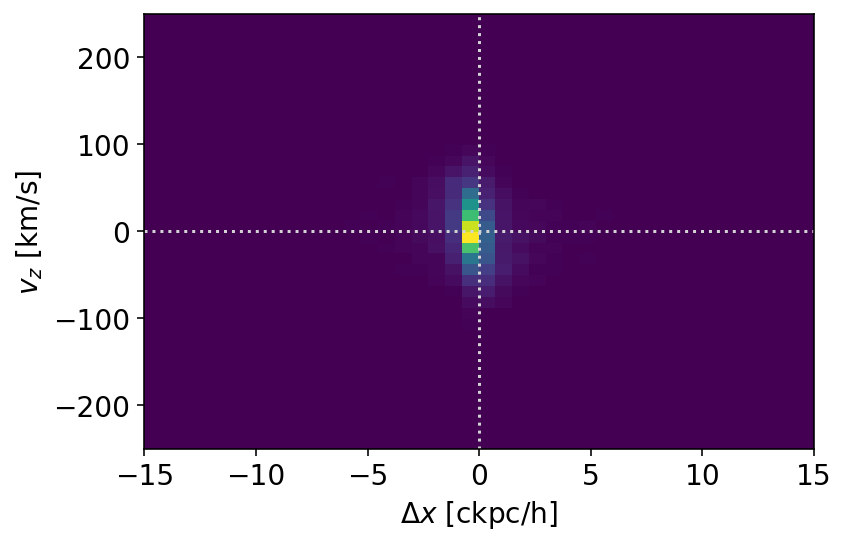

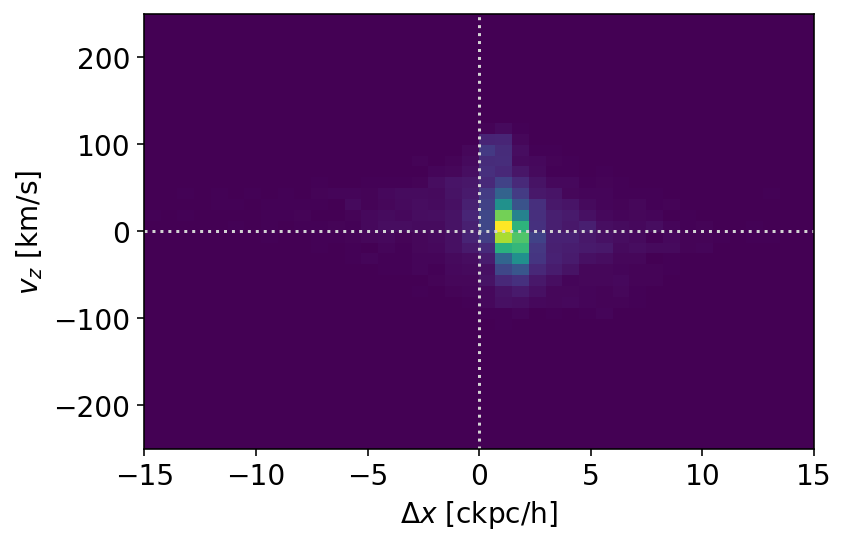

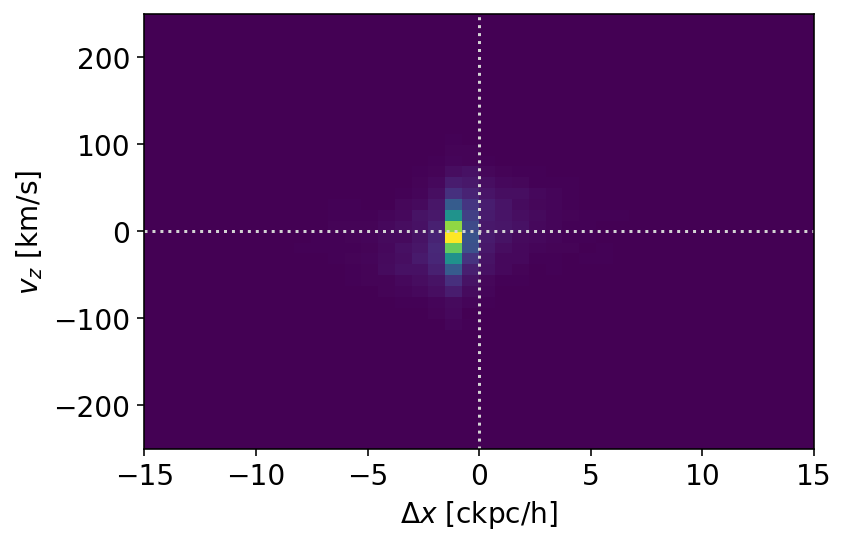

In [10]:
for i in range(len(subhaloIDs)):
    try:
        axs[i] = plotXV_subhalo(subhalo[i], id_pos = 0, id_vel = 2, ptlType='stars')
        #print(f'Above, {subhaloIDs[i]}')
    except AttributeError: continue

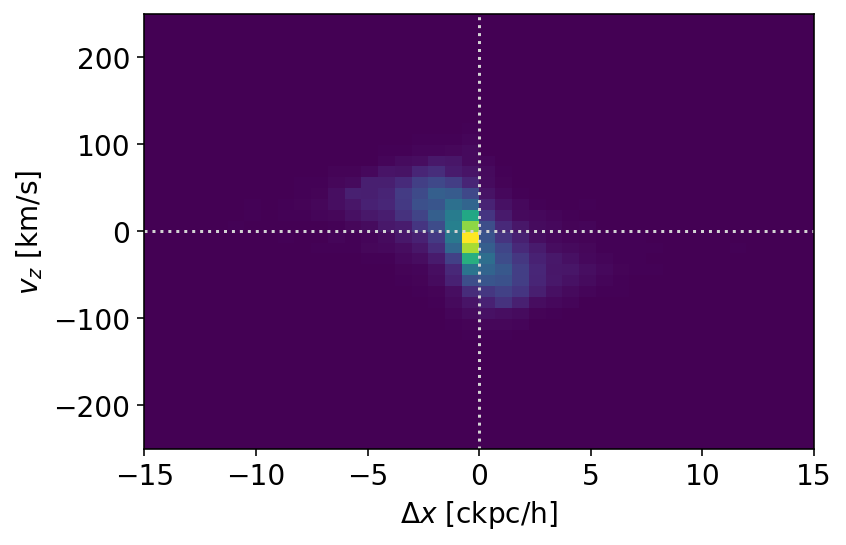

In [11]:
ax = plotXV_subhalo(subhalo[12], id_pos = 0, id_vel = 2, ptlType='stars')